In [1]:
%matplotlib inline
import numpy as np
from numpy import loadtxt, zeros, ones, array, linspace, logspace, mean, std, arange
import matplotlib.pyplot as plt
import random as rnd
import pandas as pd
from matplotlib import *
from mpl_toolkits.mplot3d import Axes3D

In [287]:
# Построить и визуализировать распределения: (log(x),  x^2 - x^3,  sin(x)*tg(x) ),  x[0; 1000]

In [2]:
x = [i for i in range(1, 1001, 50)]
y1 = [np.log(i) for i in x]
y2 = [(i**2) - (i**3) for i in x]
y3 = [(np.sin(i)*np.tan(i)) for i in x]

In [289]:
# For y1

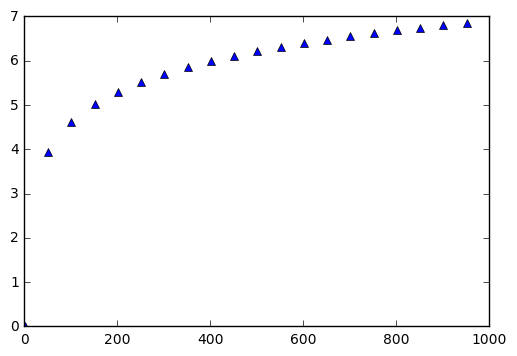

In [3]:
plt.plot(x, y1, 'b^')

In [194]:
# For y2

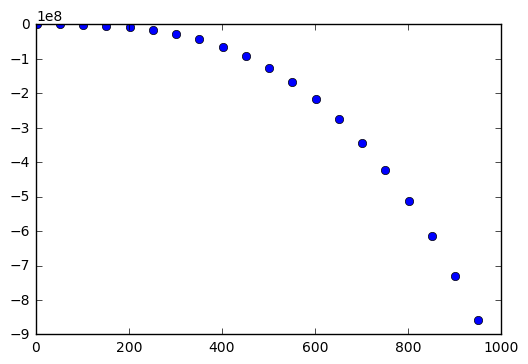

In [4]:
plt.plot(x, y2, 'o')

In [196]:
# For y3

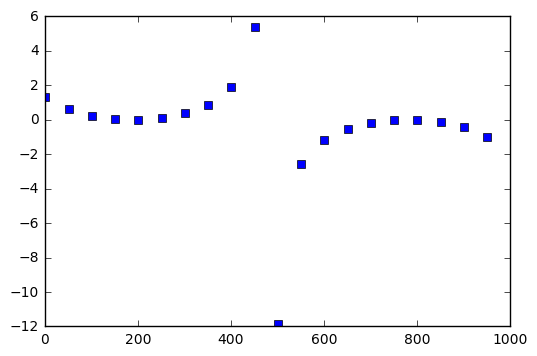

In [5]:
plt.plot(x, y3, 'bs')

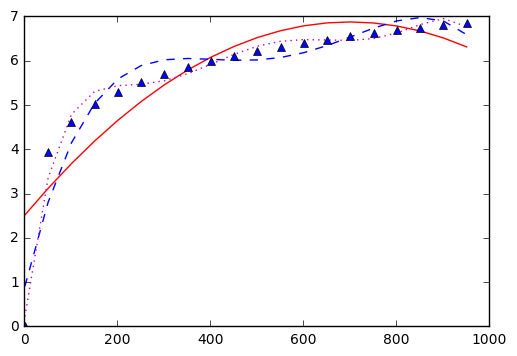

In [6]:
plt.plot(x, np.polyval(np.polyfit(x, y1, 2), x), 'r-')
plt.plot(x, np.polyval(np.polyfit(x, y1, 4), x), 'b--')
plt.plot(x, np.polyval(np.polyfit(x, y1, 6), x), 'm:')
plt.plot(x, y1, 'b^')

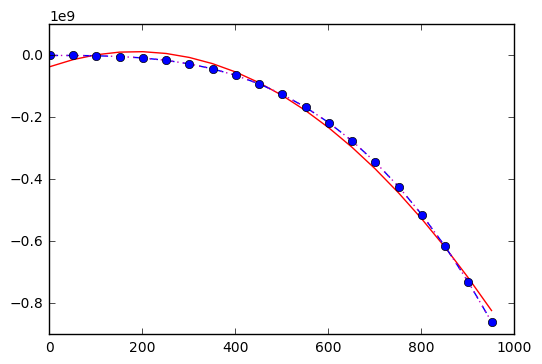

In [7]:
plt.plot(x, np.polyval(np.polyfit(x, y2, 2), x), 'r-')
plt.plot(x, np.polyval(np.polyfit(x, y2, 4), x), 'b--')
plt.plot(x, np.polyval(np.polyfit(x, y2, 6), x), 'm:')
plt.plot(x, y2, 'o')

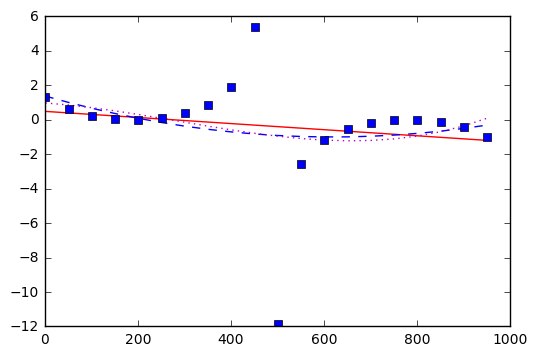

In [8]:
plt.plot(x, np.polyval(np.polyfit(x, y3, 1), x), 'r-')
plt.plot(x, np.polyval(np.polyfit(x, y3, 2), x), 'b--')
plt.plot(x, np.polyval(np.polyfit(x, y3, 3), x), 'm:')
plt.plot(x, y3, 'bs')

In [10]:
def mean_normalisation(data):
    return [(i - np.mean(data)/np.std(data)) for i in data]

In [11]:
def normalisation(data):
    return [i/max(data) for i in data]

In [12]:
def feature_normalize(X):
    mean_r = []
    std_r = []

    X_norm = X

    n_c = X.shape[1]
    for i in range(n_c):
        m = mean(X[:, i])
        s = std(X[:, i])
        mean_r.append(m)
        std_r.append(s)
        X_norm[:, i] = (X_norm[:, i] - m) / s

    return X_norm, mean_r, std_r

In [13]:
def multilinear_regression(X, Y, W, learn_rate, funk):
    new_W = []
    for w in W:
        new_w = w - learn_rate * sum([(funk(X[i], W) - Y[i]) * X[i] for i in range(len(X))]) / len(X)
        new_W.append(new_w)
    return new_w

In [14]:
def compute_cost(X, y, theta):
    m = y.size
    predictions = X.dot(theta)
    sqErrors = (predictions - y)
    J = (1.0 / (2 * m)) * sqErrors.T.dot(sqErrors)

In [15]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.size #к-во семплов 
    J_history = zeros(shape=(num_iters, 1))

    for i in range(num_iters):
        predictions = X.dot(theta)
        theta_size = theta.size
        for it in range(theta_size):
            temp = X[:, it]
            temp.shape = (m, 1)
            errors_x1 = (predictions - y) * temp
            theta[it][0] = theta[it][0] - alpha * (1.0 / m) * errors_x1.sum()
        J_history[i, 0] = compute_cost(X, y, theta)
    return theta, J_history

In [16]:
from numpy import loadtxt, zeros, ones, array, linspace, logspace
from pylab import scatter, show, plot, contour

In [17]:
data = np.loadtxt('ex1data2.txt', delimiter=',')

FileNotFoundError: [Errno 2] No such file or directory: 'ex1data2.txt'

NameError: name 'data' is not defined

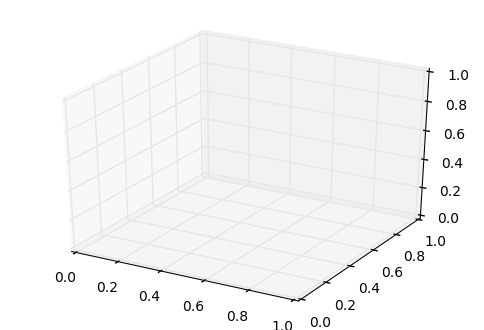

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 1000
for c, m, zl, zh in [('b', 'o', -200, -100)]:
    xs = data[:, 0]
    ys = data[:, 1]
    zs = data[:, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)
plt.show()

In [304]:
# К-во трейновых семплов

In [19]:
X = data[:, :2]
y = data[:, 2]

NameError: name 'data' is not defined

In [20]:
m = y.size
y.shape = (m, 1)

NameError: name 'y' is not defined

In [21]:
x, mean_r, std_r = feature_normalize(X)

NameError: name 'X' is not defined

In [22]:
it = ones(shape=(m, 3))
it[:, 1:3] = x

TypeError: an integer is required

In [23]:
#Показываем градиентный спуск и к-во итераций 

In [24]:
theta = zeros(shape=(3, 1))

In [25]:
iterations = 10000
alpha = 0.00000001

In [26]:
theta, J_history = gradient_descent(it, y, theta, alpha, iterations)
#print (theta, J_history)
plot(arange(iterations), J_history)
xlabel('Iterations')
ylabel('Cost Function')
plt.show()

NameError: name 'it' is not defined